<a href="https://colab.research.google.com/github/archangel2006/PYML-2025/blob/main/PYML12(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Data Visualization

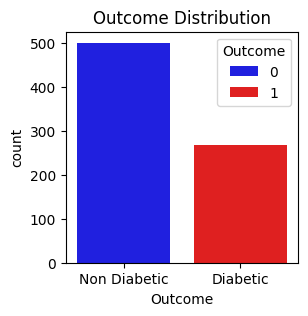

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Outcome',hue='Outcome',palette=['blue','red'])
plt.title("Outcome Distribution")
plt.xticks([0,1],['Non Diabetic','Diabetic'])
plt.show()

#x="Outcome":Plots the unique values in the Outcome column on the x-axis and their counts on the y-axis.

In [ ]:
x = df.drop('Outcome', axis=1) # All columns except target
y = df['Outcome']  # Target Variable/Columns

#Drops the column named 'Outcome',axis=1 means you're dropping a column and
#Assigns the resulting DataFrame (with 'Outcome' removed) to the variable X
#selects the 'Outcome' column from the DataFrame and Assigns it to the variable y.

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression(max_iter=1000)

reg.fit(x_train,y_train)

#This sets the maximum number of iterations the solver will use to try to find the best model coefficients.
#Logistic regression uses an optimization algorithm (like gradient descent).
#Sometimes, especially with large or complex data, the default (100) iterations may not be enough to converge.
#Setting it to 1000 gives it more time to find the best solution.

LogisticRegression(max_iter=1000)

In [ ]:
# Prediction

y_pred = reg.predict(x_test)

#.predict(X_test): Runs the model on the test features (X_test) and returns the predicted labels.

# Accuracy Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#The dimension of this matrix is 2*2 because this model is binary classification.
#You have two classes 0 and 1. Diagonal values represent accurate predictions,
#while non-diagonal elements are inaccurate predictions. In the output, 120 and 50 are actual predictions,
#and 30 and 31 are incorrect predictions.

Accuracy: 0.7359307359307359

Confusion Matrix:
 [[120  31]
 [ 30  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Visualizing Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

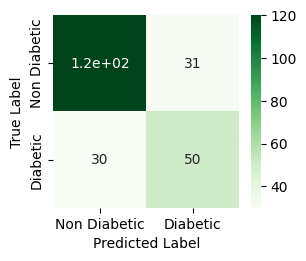

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,2.5))
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=['Non Diabetic','Diabetic'], yticklabels=['Non Diabetic','Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Test

In [ ]:
# Example input: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

input_data = [[2, 120, 70, 20, 99, 25.0, 0.5, 30]]

In [ ]:
input_data

[[2, 120, 70, 20, 99, 25.0, 0.5, 30]]

Machine learning models like model.predict() expect 2D input (shape: [n_samples, n_features]).

In [ ]:
prediction = reg.predict(input_data)

#It is a NumPy array containing the predicted class for each row in the input.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
prediction

#shape (1,) → It contains 1 element

array([0])

In [ ]:
print("Prediction (0 = No Diabetes, 1 = Diabetes):", prediction[0])

Prediction (0 = No Diabetes, 1 = Diabetes): 0


In [ ]:
# some columns have 0 values...lets replace them with the mean and the median values and see the effect

(df == 0).sum()

#This checks how many zero values are present in each column of the DataFrame.

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [ ]:
# Replace zeroes in some features with NaN, then fill with median
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#A value of 0 pregnancies is logically valid — it simply means the person has never been pregnant.
#It's not a mistake or missing value — unlike Glucose or BMI, where 0 is medically impossible
#(you can't have 0 blood pressure or BMI and still be alive).

In [ ]:
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

df.fillna(df.median(), inplace=True)



In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
(df ==0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


# Feature Scaling

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Step 4: Feature Scaling

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Step 5: Train-Test Split

from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Model Training

model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Step 7: Model Evaluation

y_pred = model.predict(x_test)

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533

Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

